# Expresso Churn Prediction

### Read to Data

In [89]:
import pandas as pd
import numpy as np
train = pd.read_csv('./Train.csv')
test = pd.read_csv('./Test.csv')

In [90]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [91]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [92]:
## check missing values
train.isna().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [93]:
test.isna().sum()

user_id               0
REGION            39293
TENURE                0
MONTANT           34951
FREQUENCE_RECH    34951
REVENUE           33490
ARPU_SEGMENT      33490
FREQUENCE         33490
DATA_VOLUME       49338
ON_NET            36383
ORANGE            41200
TIGO              59788
ZONE1             92320
ZONE2             93578
MRG                   0
REGULARITY            0
TOP_PACK          41703
FREQ_TOP_PACK     41703
dtype: int64

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          60707 non-null   object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         65049 non-null   float64
 4   FREQUENCE_RECH  65049 non-null   float64
 5   REVENUE         66510 non-null   float64
 6   ARPU_SEGMENT    66510 non-null   float64
 7   FREQUENCE       66510 non-null   float64
 8   DATA_VOLUME     50662 non-null   float64
 9   ON_NET          63617 non-null   float64
 10  ORANGE          58800 non-null   float64
 11  TIGO            40212 non-null   float64
 12  ZONE1           7680 non-null    float64
 13  ZONE2           6422 non-null    float64
 14  MRG             100000 non-null  object 
 15  REGULARITY      100000 non-null  int64  
 16  TOP_PACK        58297 non-null   object 
 17  FREQ_TOP_PA

In [96]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [97]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000.000000,58297.000000
mean,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,28.122430,9.276035
std,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,22.324101,12.369808
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000
max,201500.000000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.000000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


The above data shows we have alot of missing values , now let's check the percentage of the missing values.

In [98]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys =['Total','Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,374487,0.936218
ZONE1,368310,0.920775
TIGO,239386,0.598465
DATA_VOLUME,196854,0.492135
TOP_PACK,167329,0.418322
FREQ_TOP_PACK,167329,0.418322
ORANGE,166317,0.415793
REGION,157520,0.393800
ON_NET,145819,0.364548
MONTANT,140277,0.350693


In [99]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys =['Total','Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,93578.0,3.74487
ZONE1,92320.0,3.68310
TIGO,59788.0,2.39386
DATA_VOLUME,49338.0,1.96854
TOP_PACK,41703.0,1.67329
FREQ_TOP_PACK,41703.0,1.67329
ORANGE,41200.0,1.66317
REGION,39293.0,1.57520
ON_NET,36383.0,1.45819
FREQUENCE_RECH,34951.0,1.40277


In [100]:
# check the shape of our data
print('Train Data Shape'+ str(train.shape))
print()
print( 'Test Data Shape'+ str(test.shape))

Train Data Shape(400000, 19)

Test Data Shape(100000, 18)


In [101]:
train.describe(exclude = np.number)

,user_id,REGION,TENURE,MRG,TOP_PACK
count,400000,242480,400000,400000,232671
unique,400000,14,8,1,111
top,bf06583946ef876faea826e71b81523f7fe01ae7,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,95517,379439,400000,58675


In [102]:
test.describe(exclude = np.number)

,user_id,REGION,TENURE,MRG,TOP_PACK
count,100000,60707,100000,100000,58297
unique,100000,14,8,1,92
top,095c9eaf36ef9f3a9d66ccc06addff82b180f4bf,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,23998,94825,100000,14916


As we can see the userID has no duplicates,the MRG has only one labeled unique value and does not appear to be useful so we will have to drop them alongside with Zone1 and Zone2 which have many missing values

In [103]:
train.drop(['MRG','ZONE1','ZONE2'], axis =1,inplace = True)
test.drop(['MRG','ZONE1','ZONE2'], axis =1, inplace = True)
None

### Data Visualization
I intend to run exploratory data analysis using data visualization to gain more insight from our data

In [104]:
# import neccessary libraries for visualisation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [105]:
## lets investigate the distribution of our target variable
print(train['CHURN'].value_counts())

0    325156
1     74844
Name: CHURN, dtype: int64


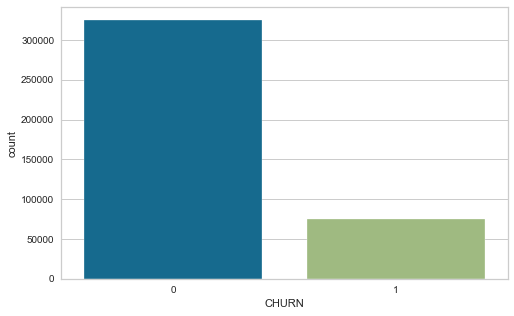

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(train['CHURN'])
plt.show()

The above plot indicates our target variable look imbalanced with about 325156 customers staying compared to those that left.This shows we need to balance the data to reduce bias, but before that lets investigate how other variables interact with the target variable

In [107]:
# checking the percentage of churn and unchurn customers
count_churn = len(train[train['CHURN']== 1])
count_unchurn = len(train[train['CHURN']== 0])
perc_of_churn = count_churn/(count_churn+count_unchurn)
print('percentage of churn is',perc_of_churn*100)
perc_of_unchurn = count_unchurn/(count_churn+count_unchurn)
print('percentage of unchurn is',perc_of_unchurn*100)

percentage of churn is 18.711
percentage of unchurn is 81.289


The above result shows the percentage of churn in our data is 18.7% and that of unchurn as 81.2%,now the sole aim of our task is to build a model that should be able to track this small percentage of customers that are most likely to churn.

Inspecting our data we see we have three major categorical variables and continous variables, that is TENURE,TOP_PACK and REGION as categorical.lets see our these features affect our target variable,but before then we do some data preprocessing on our train and test data as regard to the missing values.

### Data Preprocessing

In [108]:
# selecting our categorical variables
cat_train_data = train.select_dtypes(include=['object'])
cat_test_data = test.select_dtypes(include=['object'])

In [109]:
# create a function to fill nan for categorical columns
def fillna(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col

cat_train_data = cat_train_data.apply(lambda col:fillna(col))
cat_test_data = cat_test_data.apply(lambda col:fillna(col))

In [110]:
# verify if missing values have been filled for our categorical train data
cat_train_data.isnull().sum()

user_id     0
REGION      0
TENURE      0
TOP_PACK    0
dtype: int64

In [111]:
# verify if missing values have been filled for our categorical test data
cat_test_data.isnull().sum()

user_id     0
REGION      0
TENURE      0
TOP_PACK    0
dtype: int64

In [112]:
# Selecting our continous variable for preprocessing
con_train_data = train.select_dtypes(exclude=['object'])
con_test_data = test.select_dtypes(exclude=['object'])

In [113]:
# filling the missing values in each column with their median 
con_train_data = con_train_data.fillna(con_train_data.median())
con_test_data = con_test_data.fillna(con_test_data.median())

In [114]:
# verify if missing values have been filled for our continous train data
con_train_data.isnull().sum()

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [115]:
# verify if missing values have been filled for our continous test data
con_test_data.isnull().sum()

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [116]:
# combining our processed train and test data 
train = pd.concat([cat_train_data,con_train_data],axis=1)
test = pd.concat([cat_test_data,con_test_data],axis=1)

In [117]:
train.shape

(400000, 16)

In [118]:
test.shape

(100000, 15)

### More Visualization for insight

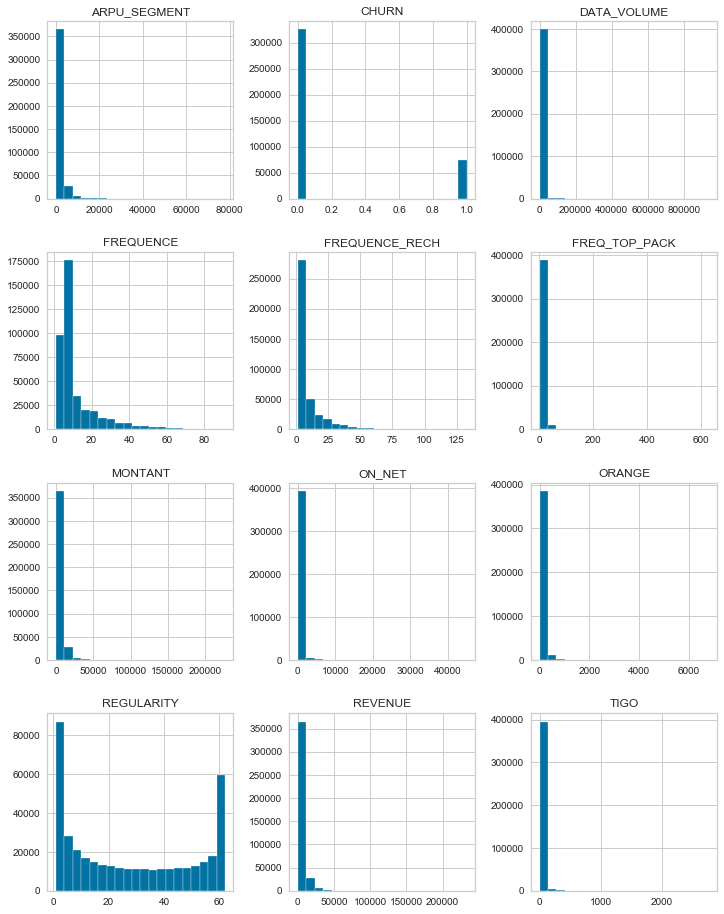

In [119]:
## Lets look at how the categorical variables interact with the target variable
train.hist(bins=20,figsize=(12,16))
plt.show()

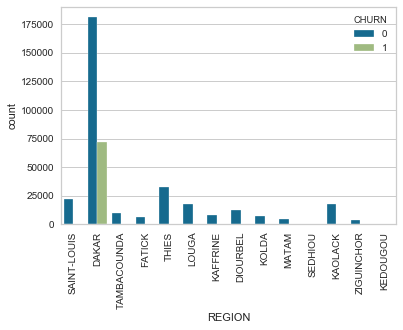

In [120]:
sns.countplot(x='REGION',hue='CHURN',data=train)
plt.xticks(rotation=90)
plt.show()

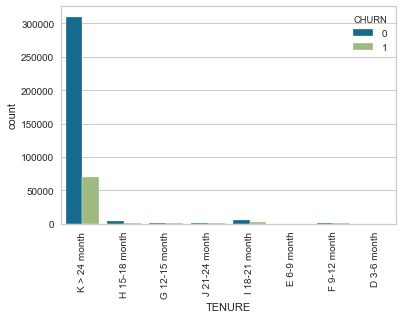

In [121]:
sns.countplot(x='TENURE',hue='CHURN',data=train)
plt.xticks(rotation=90)
plt.show()

##### observations
- The above visualization indicates that the region DAKAAR has the highest number of churned customers
- And customers who have stayed more than 24 months have the highest churn

*The top_pack seeem to have so many unique values and may not give a clear info*

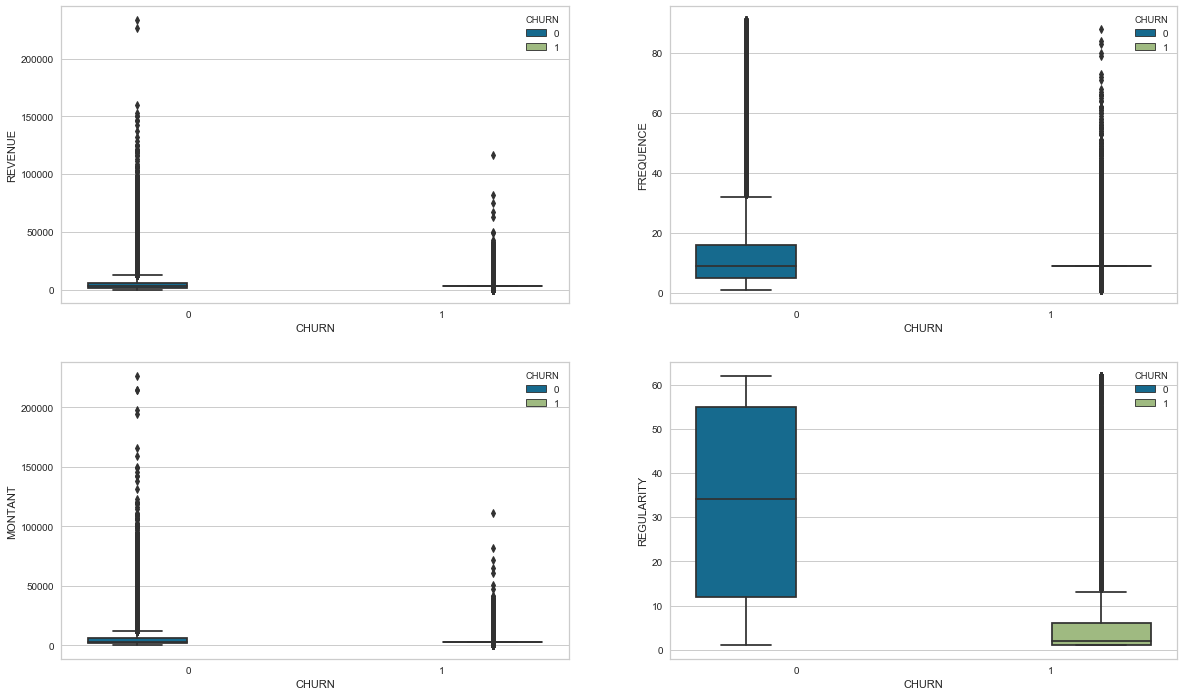

In [122]:
#lets look at how some of the vital continous variables interact with the target variable
fig, ax = plt.subplots(2,2, figsize=(20,12))
sns.boxplot(y='REVENUE',x='CHURN',hue='CHURN', data=train, ax=ax[0][0])
sns.boxplot(y='FREQUENCE', x='CHURN',hue='CHURN',data=train, ax=ax[0][1])
sns.boxplot(y='MONTANT', x='CHURN',hue='CHURN', data=train, ax=ax[1][0])
sns.boxplot(y='REGULARITY',x='CHURN',hue='CHURN',data=train, ax=ax[1][1])

plt.show()

###### observations:
- There is no significant difference in Revenue(the monthly income of clients) distribution between retained customers and churned customers.
- There is also no clear pattern in MONTANT(top up amount) between retained customers and churned custmers.
- The frequency does not give a significant info about the churning rate, relative to the number of times a customers refilled.
- In the case of REGULARITY,there is a great variability in both class,indicating that inactive customers are more likely to churn compared to active customers.

In [123]:
# lets use kdeplot to examine the Regularity for the possibity of outliers
Churn = train[train['CHURN']==0]
Unchurn = train[train['CHURN']==1]

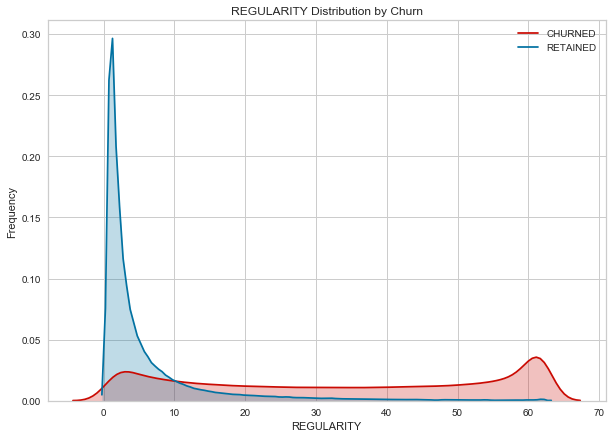

In [124]:
plt.figure(figsize =(10,7))
sns.kdeplot(Churn.REGULARITY, color='r',shade=True,label='CHURNED')
sns.kdeplot(Unchurn.REGULARITY, color='b',shade=True,label='RETAINED')

plt.title('REGULARITY Distribution by Churn')
plt.ylabel('Frequency')
plt.xlabel('REGULARITY')
plt.show()

### Feature Engineering
Now we prepare our data features for our model building

In [125]:
# Encoding our categorical train data
from sklearn.preprocessing import LabelEncoder
train['REGION'] = LabelEncoder().fit_transform(train.REGION)
train['TENURE'] = LabelEncoder().fit_transform(train.TENURE)
train['TOP_PACK'] = LabelEncoder().fit_transform(train.TOP_PACK)

In [126]:
# Encoding our categorical test data
test['REGION'] = LabelEncoder().fit_transform(test.REGION)
test['TENURE'] = LabelEncoder().fit_transform(test.TENURE)
test['TOP_PACK'] = LabelEncoder().fit_transform(test.TOP_PACK)

In [127]:
train.head()

,user_id,REGION,TENURE,TOP_PACK,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,9,7,15,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,7,25,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,11,7,15,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,2,7,84,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,2,7,15,3000.0,6.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,5.0,0


In [128]:
# Feature selection
X = train.drop(columns=['user_id','CHURN'])
y = train['CHURN']

In [129]:
from sklearn.model_selection import train_test_split
# splitting our train data into train and validation
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3,shuffle=True,
                                                         stratify= y, 
                                                          random_state=1)

Looking at the above partitioning, our target variable from our analysis seem to be imbalanced,so we applied stratified splitting so there wont be leakages in our model.

In [130]:
# We apply standard scaler to our numeric values by setting them to mean values of 0s and standard deviation of 1s.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit scaler on our train set
x_train_scaled = scaler.fit_transform(x_train) 
x_val_scaled = scaler.transform(x_val)

### Building our Model
we will be using the following Algorithm to test our model performance

In [131]:
import lightgbm as lgb
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [132]:
# instantiate our model
clf = lgb.LGBMClassifier(objective='binary',metric='binary_logloss',random_state=1)

In [133]:
# fit our model
clf.fit(x_train_scaled,y_train)

LGBMClassifier(metric='binary_logloss', objective='binary', random_state=1)

In [134]:
lgb_pred = clf.predict_proba(x_val_scaled)

In [135]:
log_loss(y_val, lgb_pred)

0.2739167688977378

The above code shows our evaluated log loss is minimal which looks good for a good model, now we train the model using our full dataset.But then lets take look at the classification report and comfusion matrix of our train and test set.

In [136]:
from yellowbrick.classifier import classification_report

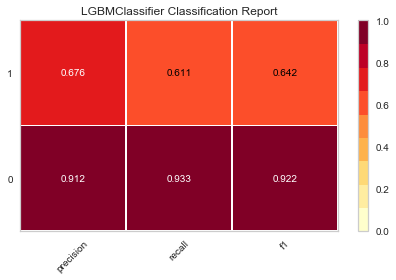

In [137]:
clf = lgb.LGBMClassifier(objective='binary',metric='binary_logloss',random_state=1)
viz = classification_report(clf,x_train_scaled,y_train)

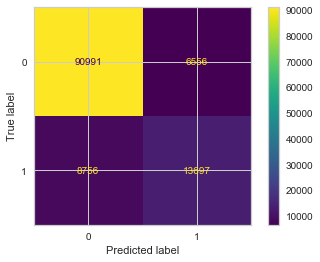

In [138]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(clf,x_val_scaled,y_val)

The chat above indicates we haved 90991 + 13697 correct predicted values and 8756 + 6556 incorrect predicted values which is a good fit for the business

### Full Train

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          400000 non-null  int32  
 2   TENURE          400000 non-null  int32  
 3   TOP_PACK        400000 non-null  int32  
 4   MONTANT         400000 non-null  float64
 5   FREQUENCE_RECH  400000 non-null  float64
 6   REVENUE         400000 non-null  float64
 7   ARPU_SEGMENT    400000 non-null  float64
 8   FREQUENCE       400000 non-null  float64
 9   DATA_VOLUME     400000 non-null  float64
 10  ON_NET          400000 non-null  float64
 11  ORANGE          400000 non-null  float64
 12  TIGO            400000 non-null  float64
 13  REGULARITY      400000 non-null  int64  
 14  FREQ_TOP_PACK   400000 non-null  float64
 15  CHURN           400000 non-null  int64  
dtypes: float64(10), int32(3), int64(2), object(1)
memory usa

In [140]:
X_train = train.drop(columns=['user_id','CHURN'])
y_train = train['CHURN']
X_train_scaled = scaler.fit_transform(X_train)

### Test Data

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          100000 non-null  int32  
 2   TENURE          100000 non-null  int32  
 3   TOP_PACK        100000 non-null  int32  
 4   MONTANT         100000 non-null  float64
 5   FREQUENCE_RECH  100000 non-null  float64
 6   REVENUE         100000 non-null  float64
 7   ARPU_SEGMENT    100000 non-null  float64
 8   FREQUENCE       100000 non-null  float64
 9   DATA_VOLUME     100000 non-null  float64
 10  ON_NET          100000 non-null  float64
 11  ORANGE          100000 non-null  float64
 12  TIGO            100000 non-null  float64
 13  REGULARITY      100000 non-null  int64  
 14  FREQ_TOP_PACK   100000 non-null  float64
dtypes: float64(10), int32(3), int64(1), object(1)
memory usage: 10.3+ MB


In [142]:
X_test = test.drop(columns=['user_id'])
X_test_scaled = scaler.transform(X_test)

In [143]:
clf.fit(X_train_scaled,y_train)
lgb_pred = clf.predict_proba(X_test_scaled)

##### loading the submission file

In [144]:
submission_df = pd.read_csv('./sample_submission.csv')
submission_df.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


We intend to replace the CHURN column with the probability of each customer churning or being retained,however the competition requires probabilities and not numbers of 0s and 1s.

In [145]:
# Ensuring we have the submission rows in the same order
np.testing.assert_array_equal(test.index.values, submission_df.index.values)

In [146]:
submission_df['CHURN'] = lgb_pred[:, 1]

In [147]:
submission_df.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.676631
1,5335efd940280b82143272275637d1e65d37eadb,0.595000
2,a581f4fa08677c26f83f643248c667e241043086,0.039306
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.017415
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.005307


In [148]:
## Saving our submission file to a csv

In [149]:
submission_df.to_csv('Expresso_lgb_pred.csv', index=False)